# Aufgabe 1 (5P)
Laden Sie den Datensatz mit den Wetterdaten aus Herford “herford_weather.csv“ . Importieren Sie in Ihre Python-IDE die Bibliotheken
Tensorflow 2.X und Keras. Führen Sie eine lineare Regression mit Keras durch mit dem Ziel, den Taupunkt Taupunkt ('dewpoint_2m (°C)‘)
vorherzusagen. Nutzen Sie dabei die folgenden Zwischenschritte:

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('herford_weather.csv', parse_dates=True, index_col=0)
print(df.shape)
df.head()

(239570, 33)


,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
time,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,3,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


## a)
Selektieren Sie und analysieren Sie die Daten 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
'apparent_temperature (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)',
'weathercode (wmo code)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'shortwave_radiation
(W/m²)', 'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'windspeed_10m (km/h)',
'windspeed_100m (km/h)', 'winddirection_10m (°)', 'winddirection_100m (°)', 'windgusts_10m (km/h)', 'et0_fao_evapotranspiration
(mm)', 'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)‘]. Wählen Sie
relevante Merkmale zur Vorhersage des Taupunkts aus. Begründen Sie Ihre Auswahl anhand der visualisierten Analyseergebnisse! (2)

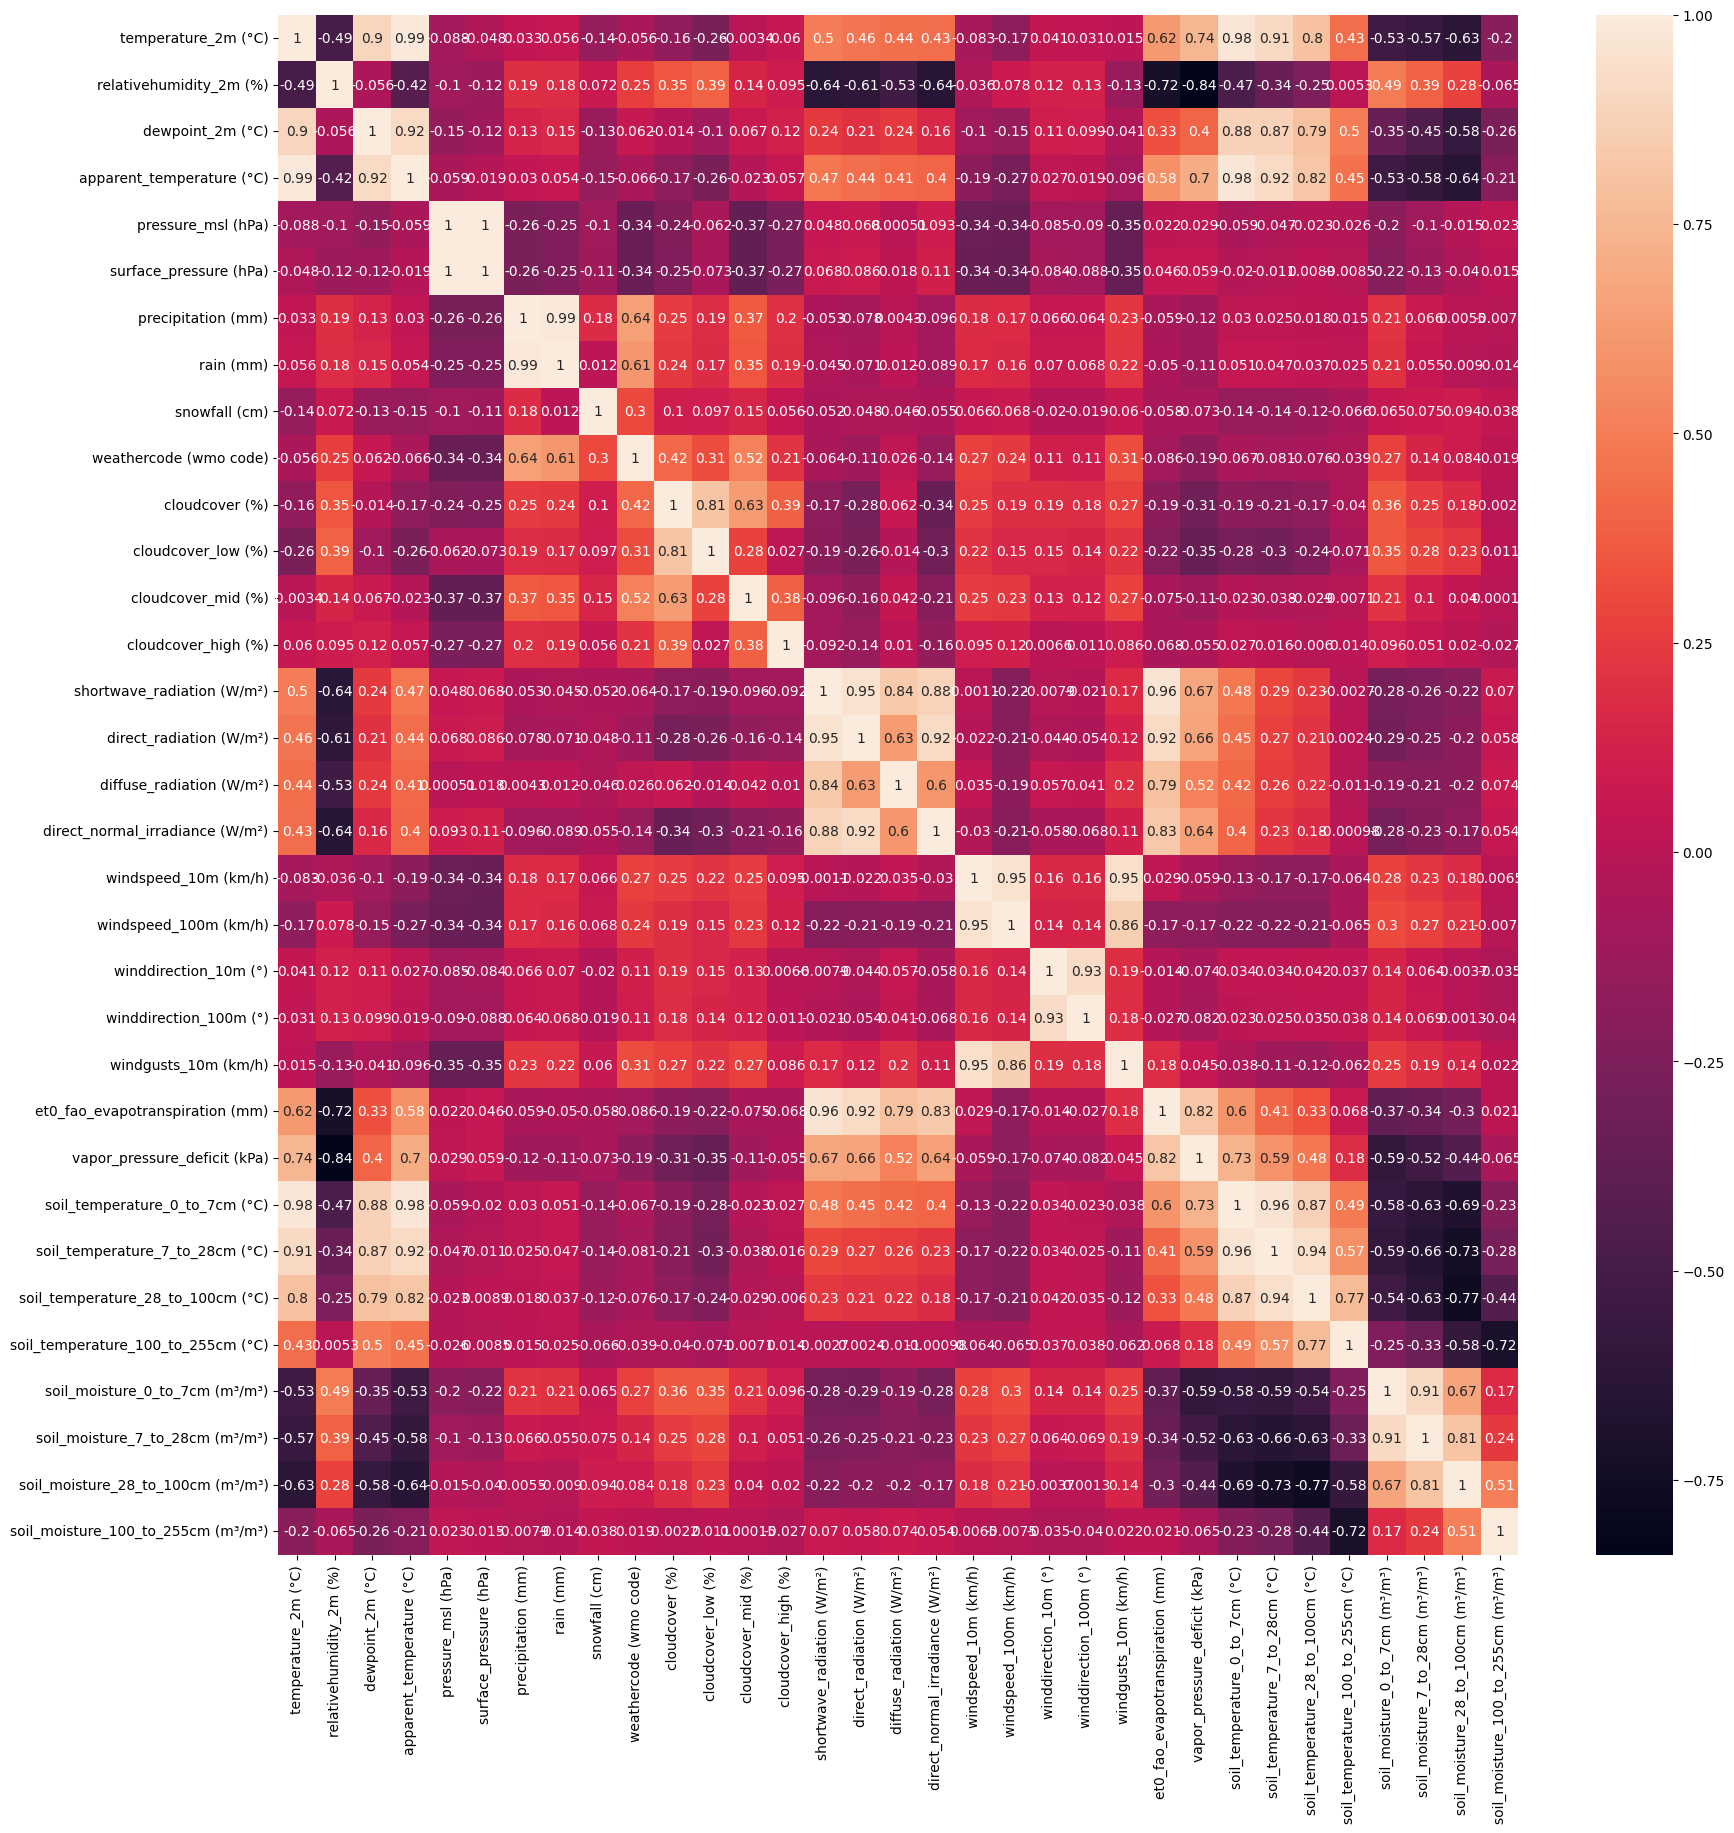

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
time,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,3,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


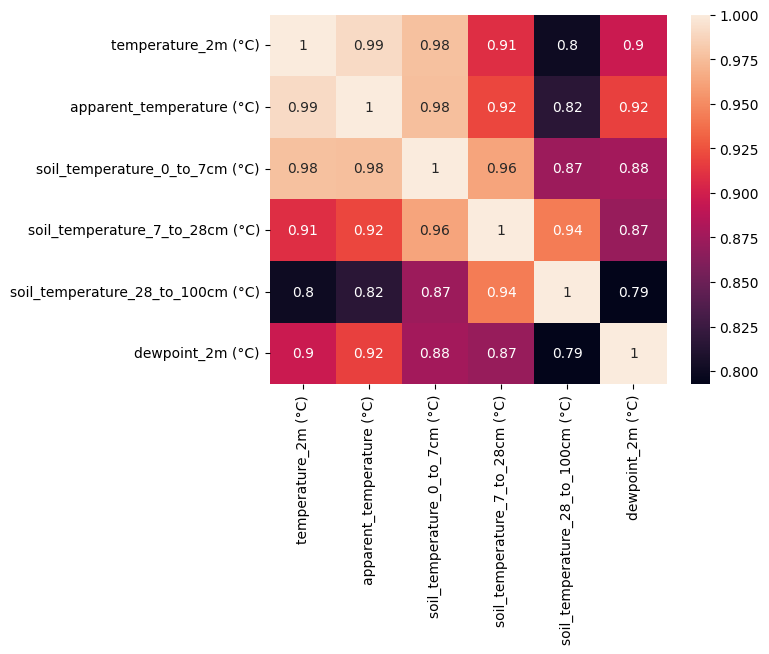

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

# most related values to dewpoint_2m (°C) are: temperature_2m (°C), apparent_temperature (°C), soil_temperature_0_to_7cm (°C), soil_temperature_7_to_28cm (°C), soil_temperature_28_to_100cm (°C)
reduced_df = df[['temperature_2m (°C)', 'apparent_temperature (°C)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'dewpoint_2m (°C)']]

sns.heatmap(reduced_df.corr(), annot=True)
df.head()

## b)
Führen Sie eine Markmalsskalierung mit dem Standardskaler durch. Bauen Sie für die von Ihnen ausgewählten Merkmale ein
passendes Keras-Modell für die Lineare Regression auf und kompilieren und trainieren Sie es mit einem passendem Optimizer und
Verlustfunktion (0.5)

In [ ]:
scaler = StandardScale()

## c)
Lernen Sie das Model an, testen Sie passende Anzahlen für die „epochs“ und die „batch_size“. (0.5)

## d)
Berechnen Sie für Ihr Modell R-Quadrat . (0.5)

## e)
Untersuchen Sie die Lernkurven, zeichnen sie sie und zeigen Sie die Lernkurve für Ihr bestes erzieltes Ergebnis! (0.5)

## f)
Nun sollen Sie testen, wie gut der Schneefall in Herford (snowfall (cm)) mithilfe einer linearen Regression aus dem Datensatz
geschätzt werden kann. Führen Sie dazu die Schritte a - e noch einmal durch. Erklären Sie Ihr Ergebnis. (1)